## Lecture 12 in-class exercise
### Ziyan Hu Dec.5

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [14]:
# EM
def EM(dat, EStep, MStep, starting, tol=1e-10):
    par_prev = starting
    delta = EStep(dat, par_prev)
    par = MStep(delta, dat)
    n_iter = 1

    while (abs(np.array(par) - np.array(par_prev)) > tol).any():
        par_prev = par
        delta = EStep(dat, par_prev)
        par = MStep(delta, dat)
        n_iter += 1

    return par, n_iter

In [5]:
# Read data
faithful_df = pd.read_table('faithful.dat', sep='\s+', header=13, index_col=0)
faithful_df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


Text(0, 0.5, 'waiting')

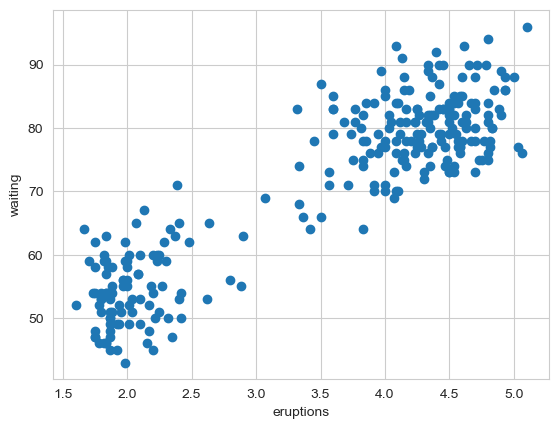

In [6]:
plt.scatter(faithful_df['eruptions'], faithful_df['waiting'])
plt.xlabel('eruptions')
plt.ylabel('waiting')

(array([ 1.,  8.,  7., 10.,  6., 12., 15.,  7.,  4., 13.,  4.,  7.,  3.,
         3.,  3.,  9.,  8.,  6., 17., 27., 18., 13., 26., 16.,  8.,  6.,
         9.,  2.,  3.,  1.]),
 array([43.        , 44.76666667, 46.53333333, 48.3       , 50.06666667,
        51.83333333, 53.6       , 55.36666667, 57.13333333, 58.9       ,
        60.66666667, 62.43333333, 64.2       , 65.96666667, 67.73333333,
        69.5       , 71.26666667, 73.03333333, 74.8       , 76.56666667,
        78.33333333, 80.1       , 81.86666667, 83.63333333, 85.4       ,
        87.16666667, 88.93333333, 90.7       , 92.46666667, 94.23333333,
        96.        ]),
 <BarContainer object of 30 artists>)

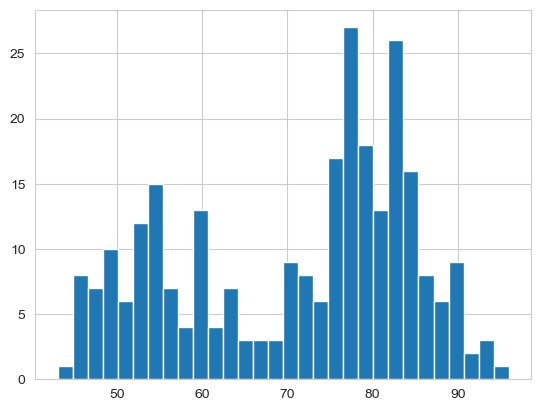

In [7]:
Y = faithful_df['waiting']
plt.hist(Y, bins=30)

In [11]:
# E-Step: Evaluating E(Z_i | Y_i, pars)
def EStep(Y, pars):
    mu1, mu2, sigma1, sigma2, p = pars

    phi1 = stats.norm.pdf(Y, loc=mu1, scale=sigma1)
    phi2 = stats.norm.pdf(Y, loc=mu2, scale=sigma2)

    return (p * phi2) / ((1 - p) * phi1 + p * phi2)

In [12]:
# M-Step: Updating the parameters - pars
def MStep(delta, Y):
    n = Y.shape[0]

    mu1hat = np.sum((1 - delta) * Y) / np.sum(1 - delta)
    mu2hat = np.sum(delta * Y) / np.sum(delta)
    sigma1hat = (np.sum((1 - delta) * (Y - mu1hat) ** 2) / np.sum(1 - delta)) ** 0.5
    sigma2hat = (np.sum(delta * (Y - mu2hat) ** 2) / np.sum(delta)) ** 0.5
    phat = np.sum(delta) / n

    return mu1hat, mu2hat, sigma1hat, sigma2hat, phat

In [15]:
%%time
EM(Y, EStep, MStep, starting=(80, 50, 6, 5, 0.5))

CPU times: user 90.6 ms, sys: 7.86 ms, total: 98.4 ms
Wall time: 105 ms


((80.09106940263243,
  54.614856140463154,
  5.867734423808815,
  5.8712194120878465,
  0.36088607378536847),
 55)